In [79]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import json

# Permitir que Bokeh muestre gráficos en el cuaderno de Jupyter
output_notebook()

# Configuración para que los gráficos se vean mejor
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


Loading BokehJS ...

In [80]:
# URL de la API de Covid Tracking Project
url = "https://api.covidtracking.com/v1/states/daily.json"

# Solicitar los datos desde la API
response = requests.get(url)

# Convertir los datos JSON a un DataFrame de pandas
if response.status_code == 200:
    data = pd.DataFrame(response.json())
    print("Datos cargados con éxito")
else:
    print("Error al cargar los datos", response.status_code)


Datos cargados con éxito


In [81]:
# Inspección inicial del DataFrame
print("Dimensiones del dataset:", data.shape)
print("\nPrimeras filas:")
display(data.head())

# Obtener información básica del DataFrame
print("\nInformación del DataFrame:")
data.info()

# Resumen estadístico de las columnas numéricas
print("\nEstadísticas descriptivas:")
display(data.describe())


Dimensiones del dataset: (20780, 56)

Primeras filas:


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   f

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,2.078000e+04,2.059200e+04,9271.000000,1.329000e+04,2138.000000,2.061400e+04,17339.000000,12382.000000,11636.000000,3789.000000,...,2.078000e+04,20780.000000,2.078000e+04,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0
mean,2.020244e+07,1.651560e+05,21729.123719,8.482246e+05,1659.862956,2.186936e+06,1190.576965,9262.762478,359.621176,1934.191607,...,7.063208e+05,17508.388210,7.061500e+05,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0
std,3.608732e+03,3.267852e+05,45471.459778,1.344501e+06,4671.028548,4.436508e+06,2060.041207,12620.544081,594.831150,1953.329983,...,1.300339e+06,33586.022461,1.299997e+06,60.162742,208.237151,0.0,0.0,0.0,0.0,0.0
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,-130545.000000,0.000000e+00,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020060e+07,5.753750e+03,773.500000,5.394125e+04,43.000000,1.040498e+05,166.500000,985.250000,60.000000,501.000000,...,2.577975e+04,1205.750000,2.565875e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020090e+07,4.606450e+04,4491.000000,3.059720e+05,212.500000,6.552670e+05,531.000000,4472.000000,172.000000,1295.000000,...,1.937255e+05,6125.000000,1.935810e+05,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020120e+07,1.779580e+05,19553.000000,1.056611e+06,1295.750000,2.264766e+06,1279.000000,12248.500000,380.000000,2451.000000,...,7.737408e+05,19086.500000,7.737408e+05,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0
max,2.021031e+07,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,...,1.125679e+07,473076.000000,1.124825e+07,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0


In [82]:
# Convertir la columna 'date' al formato de fecha
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Seleccionar columnas clave para el análisis
columns = ['date', 'state', 'positive', 'negative', 'death', 'hospitalizedCurrently','hospitalizedCumulative', 'onVentilatorCurrently', 'totalTestResults']
data = data[columns]

#1. Contar valores nulos (NaN) en cada columna antes de la imputación
nans_per_column = data.isnull().sum()
print("\nNúmero de NaNs por columna antes de la imputación:")
print(nans_per_column)


Número de NaNs por columna antes de la imputación:
date                          0
state                         0
positive                    188
negative                   7490
death                       850
hospitalizedCurrently      3441
hospitalizedCumulative     8398
onVentilatorCurrently     11654
totalTestResults            166
dtype: int64


In [83]:
# Imputar valores faltantes de "negative" utilizando la fórmula: negative = totalTestResults - positive
data['negative'] = data.apply(
    lambda row: max(0, row['totalTestResults'] - row['positive']) 
    if row['negative'] < 0 else row['negative'], axis=1
)
# Imputar valores faltantes de "positive" utilizando la fórmula: positive = totalTestResults - negative
data['positive'] = data.apply(
    lambda row: row['totalTestResults'] - row['negative'] 
    if pd.isnull(row['positive']) and not pd.isnull(row['totalTestResults']) and not pd.isnull(row['negative'])
    else row['positive'], axis=1
)

# Imputar valores faltantes de "totalTestResults" utilizando la fórmula: totalTestResults = negative + positive
data['totalTestResults'] = data.apply(
    lambda row: row['negative'] + row['positive'] 
    if pd.isnull(row['totalTestResults']) and not pd.isnull(row['negative']) and not pd.isnull(row['positive'])
    else row['totalTestResults'], axis=1
)
# Imputar mediante interpolación
data['hospitalizedCurrently'] = data['hospitalizedCurrently'].interpolate(method='linear')
data['hospitalizedCumulative'] = data['hospitalizedCumulative'].interpolate(method='linear')
data['onVentilatorCurrently'] = data['onVentilatorCurrently'].interpolate(method='linear')
data['death'] = data['death'].interpolate(method='linear')


# Verificación de valores nulos después de la imputación
print("\nNúmero de NaNs por columna después de la 1a imputación:")
print(data.isnull().sum())

# Mostramos una vista previa de los datos después de la limpieza e imputación
display(data.head())



Número de NaNs por columna después de la 1a imputación:
date                         0
state                        0
positive                   188
negative                  7490
death                        0
hospitalizedCurrently        0
hospitalizedCumulative       0
onVentilatorCurrently        0
totalTestResults           103
dtype: int64


,date,state,positive,negative,death,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,totalTestResults
0,2021-03-07,AK,56886.0,NaN,305.0,33.0,1293.0,2.0,1731628.0
1,2021-03-07,AL,499819.0,1931711.0,10148.0,494.0,45976.0,33.5,2323788.0
2,2021-03-07,AR,324818.0,2480716.0,5319.0,335.0,14926.0,65.0,2736442.0
3,2021-03-07,AS,0.0,2140.0,0.0,649.0,36416.5,104.0,2140.0
4,2021-03-07,AZ,826454.0,3073010.0,16328.0,963.0,57907.0,143.0,7908105.0


In [84]:
data['totalTestResults'] = data['totalTestResults'].interpolate(method='linear')
data['positive'] = data['positive'].interpolate(method='linear')
data['negative'] = data['negative'].interpolate(method='linear')

# Verificación de valores nulos después de la imputación
print("\nNúmero de NaNs por columna después de la 2a imputación:")
print(data.isnull().sum())

# Mostramos una vista previa de los datos después de la limpieza e imputación
display(data.head())


Número de NaNs por columna después de la 2a imputación:
date                      0
state                     0
positive                  0
negative                  1
death                     0
hospitalizedCurrently     0
hospitalizedCumulative    0
onVentilatorCurrently     0
totalTestResults          0
dtype: int64


,date,state,positive,negative,death,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,totalTestResults
0,2021-03-07,AK,56886.0,NaN,305.0,33.0,1293.0,2.0,1731628.0
1,2021-03-07,AL,499819.0,1931711.0,10148.0,494.0,45976.0,33.5,2323788.0
2,2021-03-07,AR,324818.0,2480716.0,5319.0,335.0,14926.0,65.0,2736442.0
3,2021-03-07,AS,0.0,2140.0,0.0,649.0,36416.5,104.0,2140.0
4,2021-03-07,AZ,826454.0,3073010.0,16328.0,963.0,57907.0,143.0,7908105.0


In [85]:
# Ya que queda un valor faltante en la primera fila y la interpolación en pandas no puede imputar el primer valor faltante ya no hay un valor anterior que sirva de referencia.
data['negative'].iloc[0] = 0 
# Verificación de valores nulos después de la imputación
print("\nNúmero de NaNs por columna después de la 3a imputación:")
print(data.isnull().sum())

# Mostramos una vista previa de los datos después de la limpieza e imputación
display(data.head())


Número de NaNs por columna después de la 3a imputación:
date                      0
state                     0
positive                  0
negative                  0
death                     0
hospitalizedCurrently     0
hospitalizedCumulative    0
onVentilatorCurrently     0
totalTestResults          0
dtype: int64


C:\Users\iryna\AppData\Local\Temp\ipykernel_4184\3345550447.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['negative'].iloc[0] = 0
C:\Users\iryna\AppData\Local\Temp\ipykernel_4184\3345550447.py:2: SettingWithCopyWarning: 
A value i

,date,state,positive,negative,death,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,totalTestResults
0,2021-03-07,AK,56886.0,0.0,305.0,33.0,1293.0,2.0,1731628.0
1,2021-03-07,AL,499819.0,1931711.0,10148.0,494.0,45976.0,33.5,2323788.0
2,2021-03-07,AR,324818.0,2480716.0,5319.0,335.0,14926.0,65.0,2736442.0
3,2021-03-07,AS,0.0,2140.0,0.0,649.0,36416.5,104.0,2140.0
4,2021-03-07,AZ,826454.0,3073010.0,16328.0,963.0,57907.0,143.0,7908105.0


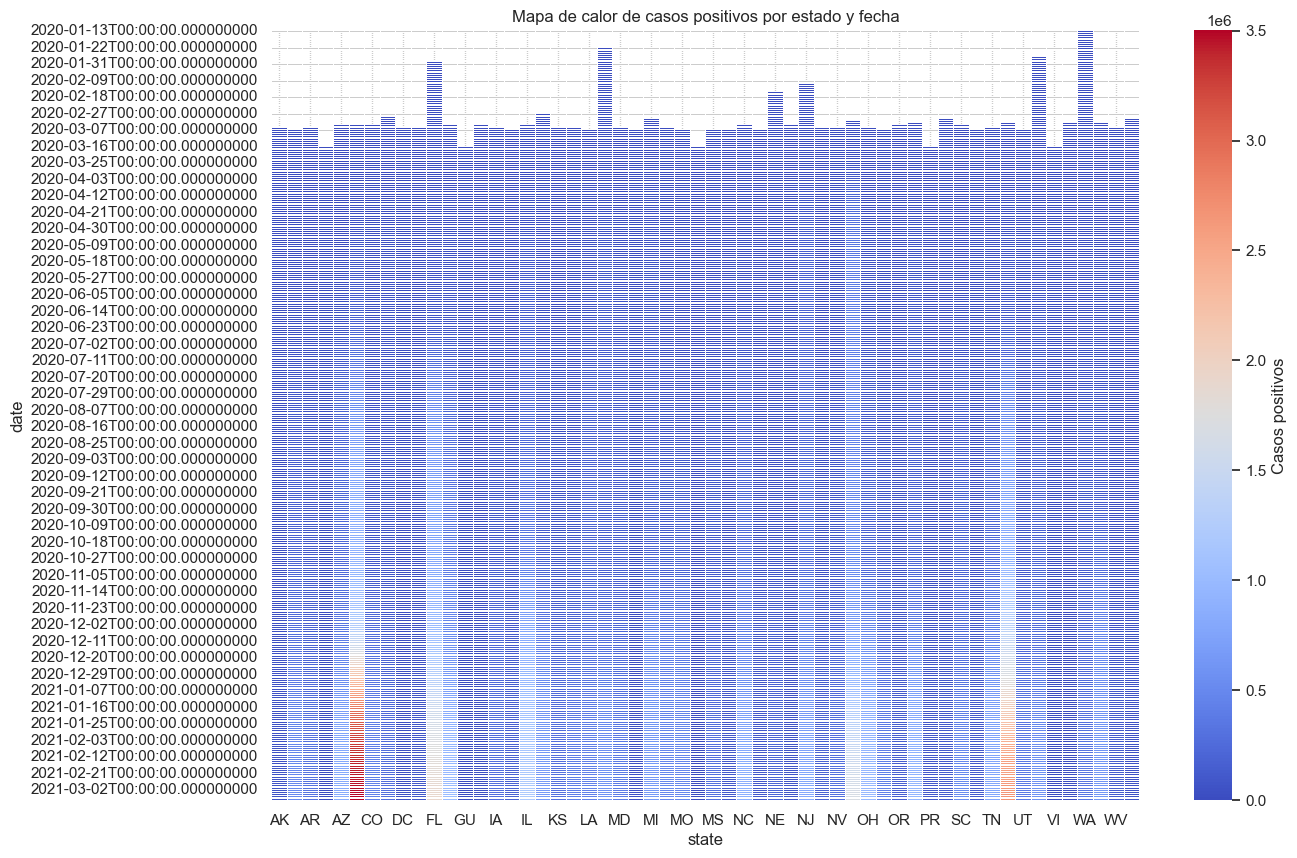

In [86]:
# Crear una tabla dinámica para el mapa de calor
pivot_table = data.pivot_table(values='positive', index='date', columns='state', aggfunc='sum')

# Generar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Casos positivos'})
plt.title("Mapa de calor de casos positivos por estado y fecha")
plt.show()


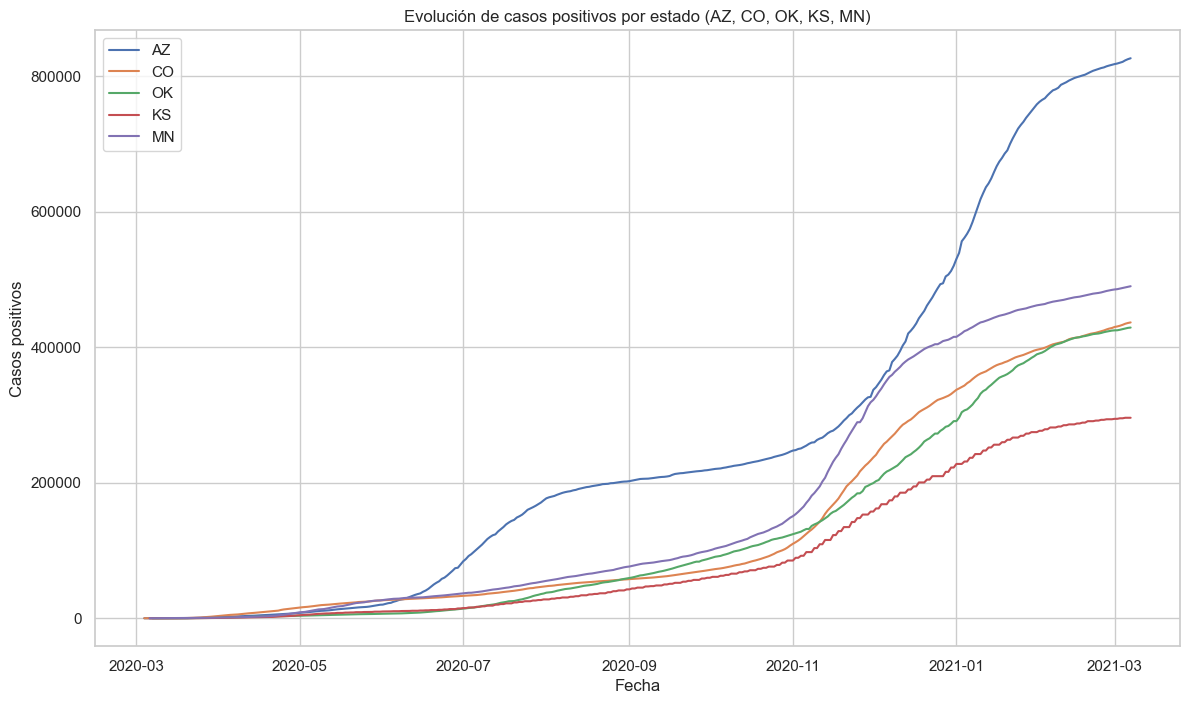

In [87]:
# Filtrar datos de estados
states_to_analyze = ['AZ', 'CO', 'OK', 'KS', 'MN']
filtered_data = data[data['state'].isin(states_to_analyze)]

# Graficar la evolución de casos positivos por estado
plt.figure(figsize=(14, 8))
for state in states_to_analyze:
    state_data = filtered_data[filtered_data['state'] == state]
    plt.plot(state_data['date'], state_data['positive'], label=state)

plt.title("Evolución de casos positivos por estado (AZ, CO, OK, KS, MN)")
plt.xlabel("Fecha")
plt.ylabel("Casos positivos")
plt.legend()
plt.show()


C:\Users\iryna\AppData\Local\Temp\ipykernel_4184\4016155732.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_incidence.index[:10], y=state_incidence.values[:10], palette='viridis')


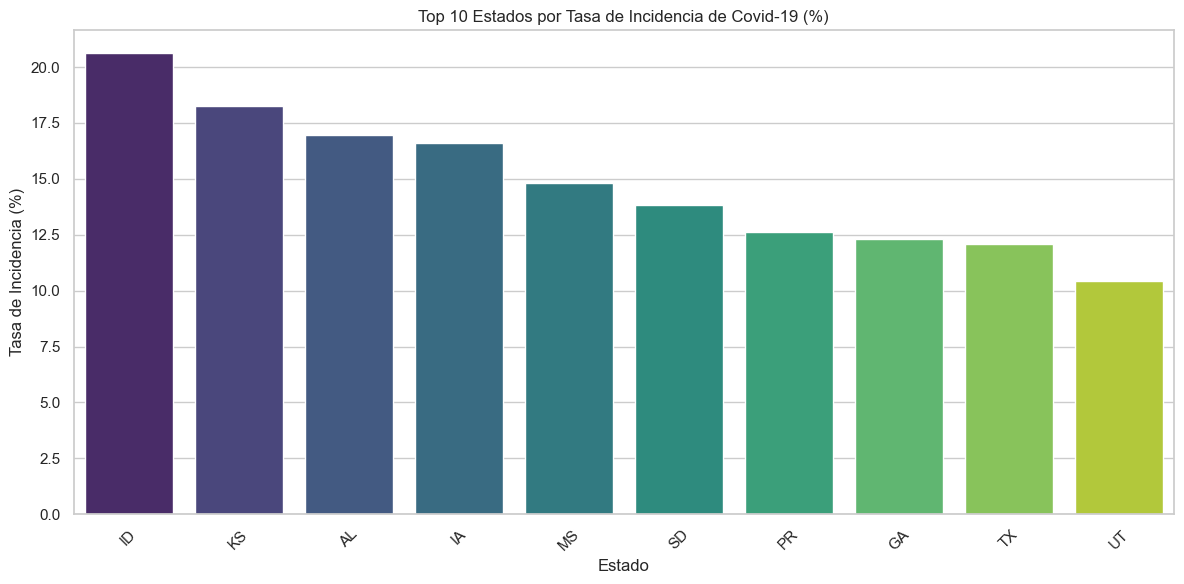

C:\Users\iryna\AppData\Local\Temp\ipykernel_4184\4016155732.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states + bottom_states, y=state_incidence.values[:5].tolist() + state_incidence.values[-5:].tolist(), palette='coolwarm')


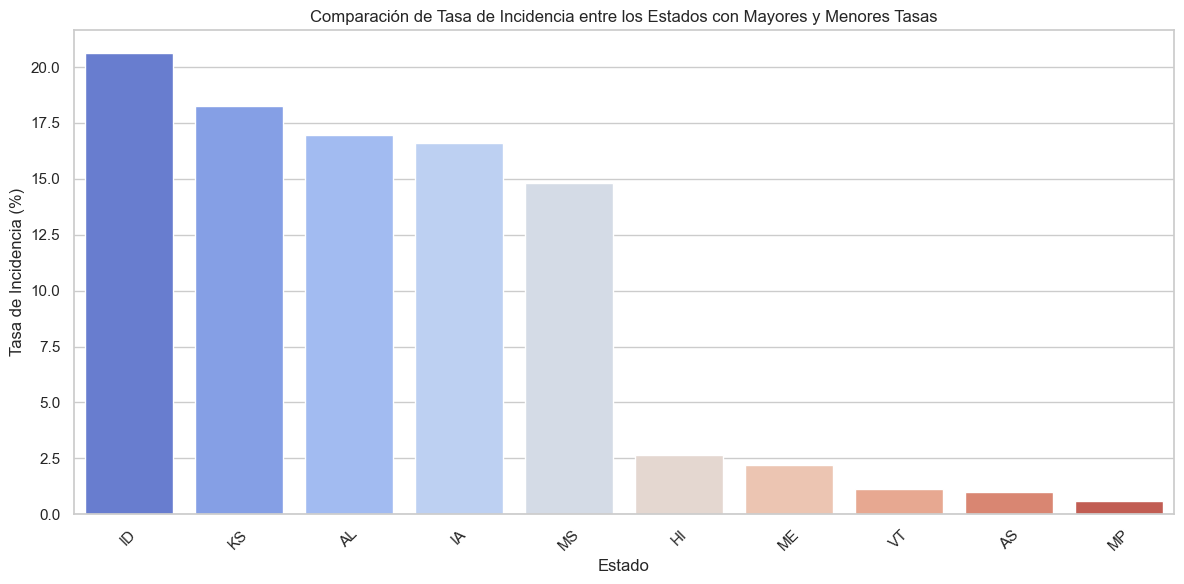

In [88]:
# Calcular la tasa de incidencia total por estado
state_incidence = data.groupby('state')['positive'].sum() / data.groupby('state')['totalTestResults'].sum() * 100
state_incidence = state_incidence.sort_values(ascending=False)

# Visualizar la comparación
plt.figure(figsize=(12, 6))
sns.barplot(x=state_incidence.index[:10], y=state_incidence.values[:10], palette='viridis')
plt.title('Top 10 Estados por Tasa de Incidencia de Covid-19 (%)')
plt.xlabel('Estado')
plt.ylabel('Tasa de Incidencia (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparar los 5 estados con mayores y menores tasas
top_states = state_incidence.index[:5].tolist()
bottom_states = state_incidence.index[-5:].tolist()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states + bottom_states, y=state_incidence.values[:5].tolist() + state_incidence.values[-5:].tolist(), palette='coolwarm')
plt.title('Comparación de Tasa de Incidencia entre los Estados con Mayores y Menores Tasas')
plt.xlabel('Estado')
plt.ylabel('Tasa de Incidencia (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

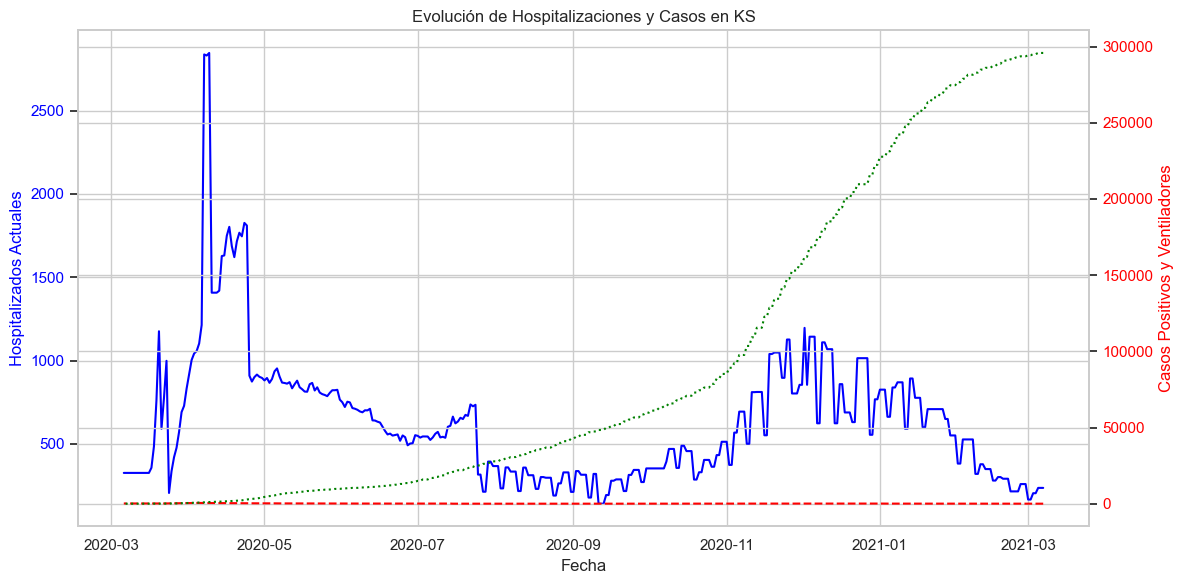

In [97]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots()

# Elegir un estado para mostrar la evolución
state_to_analyze = 'KS'  
state_data = data[data['state'] == state_to_analyze]

# Gráfico para hospitalizados actualmente
ax1.plot(state_data['date'], state_data['hospitalizedCurrently'], label='Hospitalizados Actuales', color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Hospitalizados Actuales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para los ventiladores y casos positivos
ax2 = ax1.twinx()  
ax2.plot(state_data['date'], state_data['onVentilatorCurrently'], label='En Ventilador Actualmente', linestyle='--', color='red')
ax2.plot(state_data['date'], state_data['positive'], label='Casos Positivos', linestyle=':', color='green')
ax2.set_ylabel('Casos Positivos y Ventiladores', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Añadir título y leyenda
plt.title(f'Evolución de Hospitalizaciones y Casos en {state_to_analyze}')
fig.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()


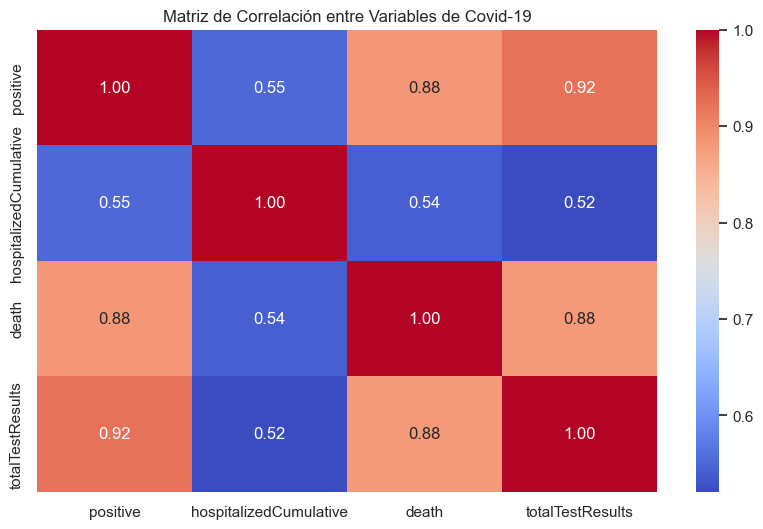

In [91]:
# Calcular la matriz de correlación
correlation_matrix = data[['positive', 'hospitalizedCumulative', 'death', 'totalTestResults']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables de Covid-19')
plt.show()
